In [1]:
import data_bern_numpy_to_preprocessed_hdf5
import logging 
from config import system_eval as sys_config
from config import system as config_sys

from matplotlib import pyplot as plt
from data_loader import load_data, load_syntetic_data
import pandas as pd

2024-05-19 14:32:32,297 NumExpr defaulting to 8 threads.


In [25]:
idx_start_tr = 0
idx_end_tr = 1
suffix = '_without_rotation_with_cs_skip_updated_ao_S10_balanced'

data_tr = data_bern_numpy_to_preprocessed_hdf5.load_masked_data_sliced(basepath=sys_config.project_data_root,
                                                                                idx_start=idx_start_tr,
                                                                                idx_end=idx_end_tr,
                                                                                train_test='val',
                                                                                suffix = suffix,
                                                                                )
        
images_tr = data_tr['sliced_images_val']
logging.info(type(images_tr))
logging.info('Shape of training images: %s' %str(images_tr.shape)) 

2024-05-18 21:29:18,809 Already preprocessed this configuration. Loading now...
2024-05-18 21:29:18,811 Name of file: /usr/bmicnas02/data-biwi-01/jeremy_students/lschlyter/4dflowmri_anomaly_detection/data/val_without_rotation_with_cs_skip_updated_ao_S10_balanced_masked_sliced_images_from_0_to_1.hdf5
2024-05-18 21:29:18,813 <class 'h5py._hl.dataset.Dataset'>
2024-05-18 21:29:18,814 Shape of training images: (64, 32, 32, 24, 4)


In [21]:
idx_start_vl = 41
idx_end_vl = 51
synthetic_data_note = '_without_rotation_with_cs_skip_updated_ao_S10_balanced_decreased_interpolation_factor_cube_3'
images_vl = load_syntetic_data(preprocess_method = 'masked_slice', idx_start=idx_start_vl, idx_end=idx_end_vl, sys_config = config_sys, note = synthetic_data_note)
images_vl_images = images_vl['images']
images_vl_masks = images_vl['masks']
images_vl_images.shape, images_vl_masks.shape

2024-05-18 21:25:22,395 Loading data from: /usr/bmicnas02/data-biwi-01/jeremy_students/lschlyter/4dflowmri_anomaly_detection/data/masked_slice_anomalies_images_from_41_to_51__without_rotation_with_cs_skip_updated_ao_S10_balanced_decreased_interpolation_factor_cube_3.hdf5


Already preprocessed this configuration. Loading now...


((4480, 32, 32, 24, 4), (4480, 32, 32, 24, 4))

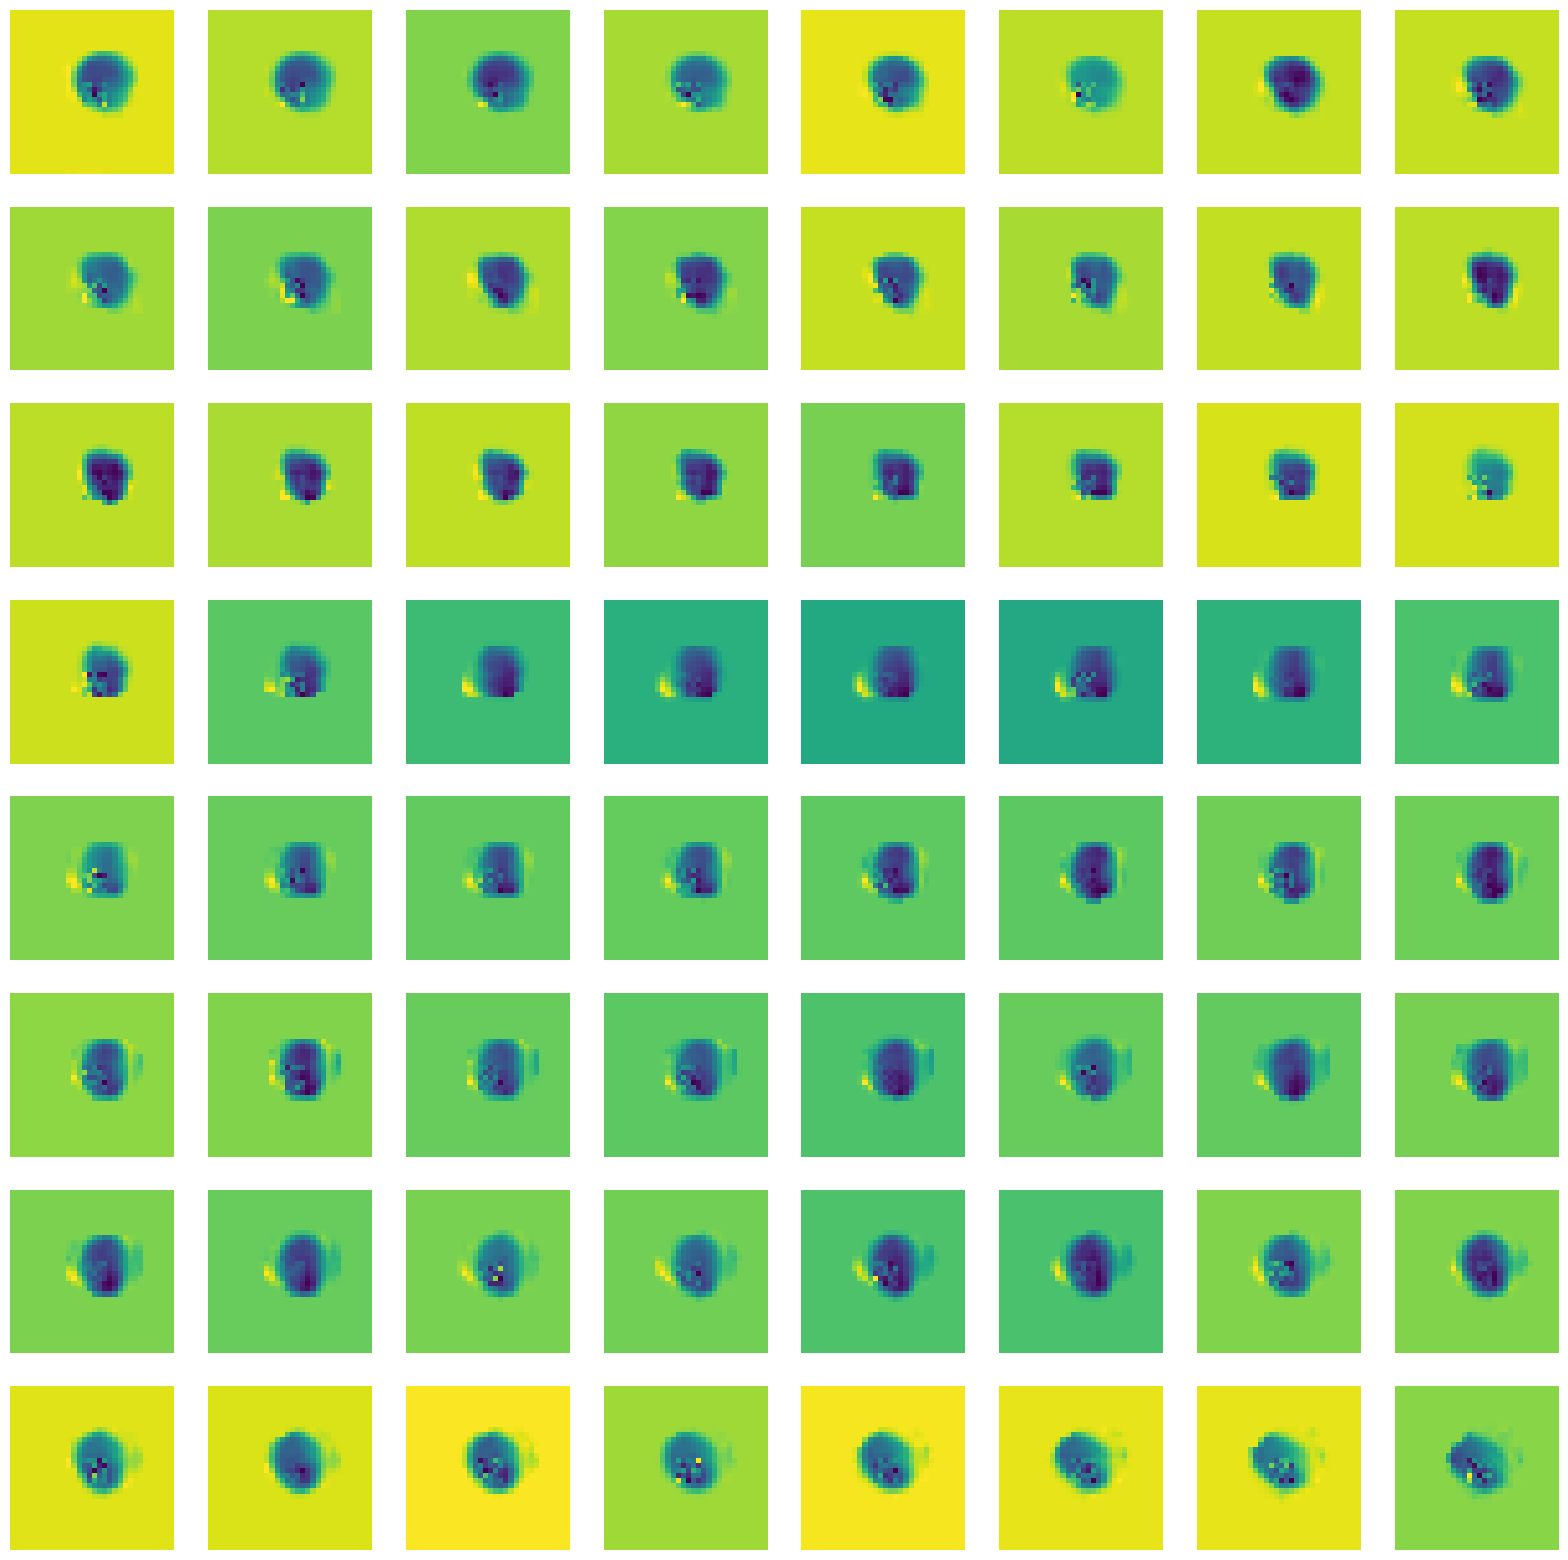

In [24]:
n_patients = images_vl_images.shape[0]/64
selected_patient = 15
time = 4
channel = 1

plt.figure(figsize=(20, 20))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(images_vl_images[selected_patient*64+i,  :, :, time, channel], cmap='viridis')
    plt.axis('off')

In [30]:
idx_start_tr = 0
idx_end_tr = 10
suffix = '_without_rotation_only_cs_skip_updated_ao_S10'

data_tr = data_bern_numpy_to_preprocessed_hdf5.load_masked_data_sliced(basepath=sys_config.project_data_root,
                                                                                idx_start=idx_start_tr,
                                                                                idx_end=idx_end_tr,
                                                                                train_test='train',
                                                                                suffix = suffix,
                                                                                )
        
images_tr_original = data_tr['sliced_images_train']
logging.info(type(images_tr_original))
logging.info('Shape of training images: %s' %str(images_tr_original.shape)) 

2024-05-15 20:04:18,396 Already preprocessed this configuration. Loading now...
2024-05-15 20:04:18,400 Name of file: /usr/bmicnas02/data-biwi-01/jeremy_students/lschlyter/4dflowmri_anomaly_detection/data/train_without_rotation_only_cs_skip_updated_ao_S10_masked_sliced_images_from_0_to_10.hdf5
2024-05-15 20:04:18,404 <class 'h5py._hl.dataset.Dataset'>
2024-05-15 20:04:18,405 Shape of training images: (640, 32, 32, 24, 4)


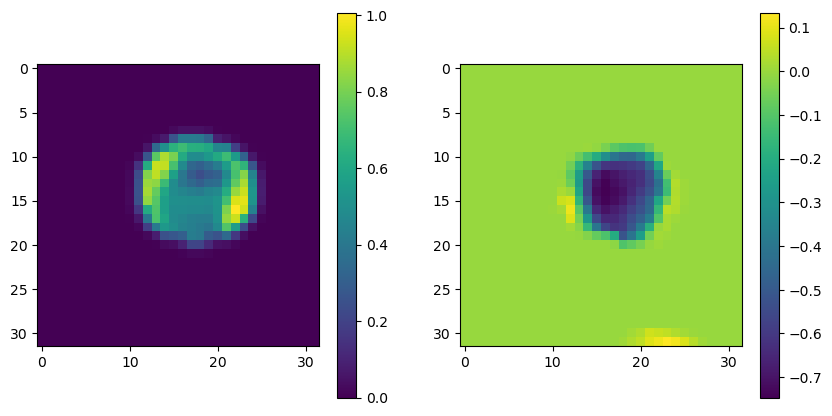

In [31]:
z_slice = 14
t_ = 3
# Plot two images next to each other
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# First image
plt.imshow(images_tr[z_slice,:,:, t_, 1], cmap='viridis')
plt.colorbar()
# second image
plt.subplot(1, 2, 2)
plt.imshow(images_tr_original[z_slice,:,:, t_, 1], cmap='viridis')
plt.colorbar()




In [32]:
images_tr[...,1:3].max(),images_tr[...,1:3].min(), images_tr_original[...,1:3].max(),images_tr_original[...,1:3].min()

(2.0922112, -0.28553653, 0.88729244, -0.93217814)

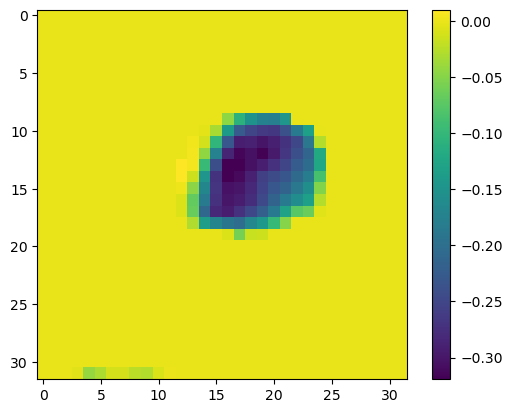

In [5]:
z_slice = 2
t_ = 4

plt.imshow(images_tr[z_slice,:,:, t_, 1], cmap='viridis')
plt.colorbar()

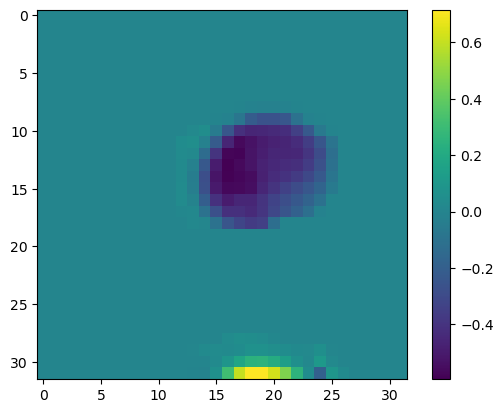

In [12]:


plt.imshow(images_tr_original[z_slice,:,:, t_, 1], cmap='viridis')
plt.colorbar()

In [2]:
import numpy as np

# Seed 5
observed_diffs_non_cs_group_seed_5 = [4.3971580e-05, 4.2590709e-06, 2.9967123e-06, 7.8641642e-07, 6.8049335e-06, 1.4948651e-05]
p_values_non_cs_group_seed_5 = [0.665, 0.816, 1.0, 1.0, 0.8605, 0.892]

observed_diffs_cs_group_seed_5 = [4.3971580e-05, 4.2590709e-06, 2.9967123e-06, 7.8641642e-07, 6.8049335e-06, 1.4948651e-05]
p_values_cs_group_seed_5 = [0.642, 0.9535, 1.0, 1.0, 0.944, 0.8275]

observed_diffs_non_cs_label_seed_5 = [4.3971580e-05, 4.2590709e-06, 2.9967123e-06, 7.8641642e-07, 6.8049335e-06, 1.4948651e-05]
p_values_non_cs_label_seed_5 = [0.5295, 0.7665, 1.0, 1.0, 0.7995, 0.8455]

observed_diffs_cs_label_seed_5 = [4.3971580e-05, 4.2590709e-06, 2.9967123e-06, 7.8641642e-07, 6.8049335e-06, 1.4948651e-05]
p_values_cs_label_seed_5 = [0.195, 0.804, 1.0, 1.0, 0.8035, 0.599]

counts_lower_diff_non_cs_label_seed_5 = [12.0, 6.0, 0.0, 0.0, 5.0, 4.0]
counts_lower_diff_cs_label_seed_5 = [4.0, 1.0, 0.0, 0.0, 1.0, 2.0]
counts_lower_diff_non_cs_acquisition_seed_5 = [13.0, 7.0, 0.0, 0.0, 5.0, 4.0]
counts_lower_diff_cs_acquisition_seed_5 = [6.0, 1.0, 0.0, 0.0, 1.0, 3.0]

# Seed 10
observed_diffs_non_cs_group_seed_10 = [1.7762519e-05, 9.9332301e-06, 4.9435721e-06, 1.8421088e-05, 6.4274527e-06, 5.8416575e-05]
p_values_non_cs_group_seed_10 = [0.667, 0.7135, 0.866, 0.848, 0.7795, 0.8945]

observed_diffs_cs_group_seed_10 = [1.7762519e-05, 9.9332301e-06, 4.9435721e-06, 1.8421088e-05, 6.4274527e-06, 5.8416575e-05]
p_values_cs_group_seed_10 = [0.8245, 0.895, 0.944, 0.6545, 0.8855, 0.5965]

observed_diffs_non_cs_label_seed_10 = [1.7762519e-05, 9.9332301e-06, 4.9435721e-06, 1.8421088e-05, 6.4274527e-06, 5.8416575e-05]
p_values_non_cs_label_seed_10 = [0.521, 0.611, 0.842, 0.7745, 0.7185, 0.931]

observed_diffs_cs_label_seed_10 = [1.7762519e-05, 9.9332301e-06, 4.9435721e-06, 1.8421088e-05, 6.4274527e-06, 5.8416575e-05]
p_values_cs_label_seed_10 = [0.3955, 0.603, 0.8085, 0.208, 0.6105, 0.0]

counts_lower_diff_non_cs_label_seed_10 = [12.0, 10.0, 4.0, 6.0, 7.0, 2.0]
counts_lower_diff_cs_label_seed_10 = [3.0, 2.0, 1.0, 4.0, 2.0, 5.0]
counts_lower_diff_non_cs_acquisition_seed_10 = [13.0, 11.0, 5.0, 6.0, 8.0, 4.0]
counts_lower_diff_cs_acquisition_seed_10 = [3.0, 2.0, 1.0, 6.0, 2.0, 7.0]

# Seed 15
observed_diffs_non_cs_group_seed_15 = [2.9252227e-05, 4.2538550e-06, 1.6106569e-06, 1.9384923e-05, 1.1725799e-05, 7.6340752e-05]
p_values_non_cs_group_seed_15 = [0.738, 0.8575, 0.947, 0.8985, 0.7805, 0.6705]

observed_diffs_cs_group_seed_15 = [2.9252227e-05, 4.2538550e-06, 1.6106569e-06, 1.9384923e-05, 1.1725799e-05, 7.6340752e-05]
p_values_cs_group_seed_15 = [0.703, 0.942, 1.0, 0.7705, 0.83, 0.881]

observed_diffs_non_cs_label_seed_15 = [2.9252227e-05, 4.2538550e-06, 1.6106569e-06, 1.9384923e-05, 1.1725799e-05, 7.6340752e-05]
p_values_non_cs_label_seed_15 = [0.623, 0.7985, 0.9145, 0.835, 0.7215, 0.5165]

observed_diffs_cs_label_seed_15 = [2.9252227e-05, 4.2538550e-06, 1.6106569e-06, 1.9384923e-05, 1.1725799e-05, 7.6340752e-05]
p_values_cs_label_seed_15 = [0.195, 1.0, 1.0, 0.404, 0.6105, 1.0]

counts_lower_diff_non_cs_label_seed_15 = [10.0, 5.0, 2.0, 4.0, 7.0, 12.0]
counts_lower_diff_cs_label_seed_15 = [4.0, 0.0, 0.0, 3.0, 2.0, 0.0]
counts_lower_diff_non_cs_acquisition_seed_15 = [10.0, 5.0, 2.0, 4.0, 8.0, 12.0]
counts_lower_diff_cs_acquisition_seed_15 = [5.0, 1.0, 0.0, 4.0, 3.0, 2.0]
# Seed 20
observed_diffs_non_cs_group_seed_20 = [7.2184657e-06, 1.2423716e-06, 5.2339456e-06, 1.2918854e-05, 8.0536411e-06, 2.7169441e-05]
p_values_non_cs_group_seed_20 = [0.867, 1.0, 0.9455, 0.822, 0.8285, 0.482]

observed_diffs_cs_group_seed_20 = [7.2184657e-06, 1.2423716e-06, 5.2339456e-06, 1.2918854e-05, 8.0536411e-06, 2.7169441e-05]
p_values_cs_group_seed_20 = [0.829, 0.8955, 1.0, 0.7725, 0.83, 0.8325]

observed_diffs_non_cs_label_seed_20 = [7.2184657e-06, 1.2423716e-06, 5.2339456e-06, 1.2918854e-05, 8.0536411e-06, 2.7169441e-05]
p_values_non_cs_label_seed_20 = [0.8445, 1.0, 0.9635, 0.809, 0.763, 0.309]

observed_diffs_cs_label_seed_20 = [7.2184657e-06, 1.2423716e-06, 5.2339456e-06, 1.2918854e-05, 8.0536411e-06, 2.7169441e-05]
p_values_cs_label_seed_20 = [0.5915, 0.804, 1.0, 0.4205, 0.592, 0.7935]

counts_lower_diff_non_cs_label_seed_20 = [4.0, 0.0, 1.0, 5.0, 6.0, 17.0]
counts_lower_diff_cs_label_seed_20 = [2.0, 1.0, 0.0, 3.0, 2.0, 1.0]
counts_lower_diff_non_cs_acquisition_seed_20 = [5.0, 0.0, 2.0, 7.0, 6.0, 19.0]
counts_lower_diff_cs_acquisition_seed_20 = [3.0, 2.0, 0.0, 4.0, 3.0, 3.0]

# Seed 25
observed_diffs_non_cs_group_seed_25 = [1.4686743e-05, 3.5614994e-07, 2.2935479e-05, 5.4305528e-06, 6.4343567e-07, 7.7719687e-06]
p_values_non_cs_group_seed_25 = [0.649, 0.947, 0.4065, 0.78, 0.9725, 0.724]

observed_diffs_cs_group_seed_25 = [1.4686743e-05, 3.5614994e-07, 2.2935479e-05, 5.4305528e-06, 6.4343567e-07, 7.7719687e-06]
p_values_cs_group_seed_25 = [0.6375, 1.0, 0.7715, 0.949, 1.0, 0.77]

observed_diffs_non_cs_label_seed_25 = [1.4686743e-05, 3.5614994e-07, 2.2935479e-05, 5.4305528e-06, 6.4343567e-07, 7.7719687e-06]
p_values_non_cs_label_seed_25 = [0.509, 0.9295, 0.24, 0.7265, 1.0, 0.61]

observed_diffs_cs_label_seed_25 = [1.4686743e-05, 3.5614994e-07, 2.2935479e-05, 5.4305528e-06, 6.4343567e-07, 7.7719687e-06]
p_values_cs_label_seed_25 = [0.195, 1.0, 0.7935, 0.8085, 1.0, 0.589]

counts_lower_diff_non_cs_label_seed_25 = [12.0, 2.0, 19.0, 7.0, 0.0, 10.0]
counts_lower_diff_cs_label_seed_25 = [4.0, 0.0, 1.0, 1.0, 0.0, 2.0]
counts_lower_diff_non_cs_acquisition_seed_25 = [14.0, 2.0, 21.0, 8.0, 1.0, 10.0]
counts_lower_diff_cs_acquisition_seed_25 = [6.0, 0.0, 4.0, 1.0, 0.0, 4.0]

# Combine results
observed_diffs_non_cs_group = np.array([
    observed_diffs_non_cs_group_seed_5,
    observed_diffs_non_cs_group_seed_10,
    observed_diffs_non_cs_group_seed_15,
    observed_diffs_non_cs_group_seed_20,
    observed_diffs_non_cs_group_seed_25
])

p_values_non_cs_group = np.array([
    p_values_non_cs_group_seed_5,
    p_values_non_cs_group_seed_10,
    p_values_non_cs_group_seed_15,
    p_values_non_cs_group_seed_20,
    p_values_non_cs_group_seed_25
])

observed_diffs_cs_group = np.array([
    observed_diffs_cs_group_seed_5,
    observed_diffs_cs_group_seed_10,
    observed_diffs_cs_group_seed_15,
    observed_diffs_cs_group_seed_20,
    observed_diffs_cs_group_seed_25
])

p_values_cs_group = np.array([
    p_values_cs_group_seed_5,
    p_values_cs_group_seed_10,
    p_values_cs_group_seed_15,
    p_values_cs_group_seed_20,
    p_values_cs_group_seed_25
])

observed_diffs_non_cs_label = np.array([
    observed_diffs_non_cs_label_seed_5,
    observed_diffs_non_cs_label_seed_10,
    observed_diffs_non_cs_label_seed_15,
    observed_diffs_non_cs_label_seed_20,
    observed_diffs_non_cs_label_seed_25
])

p_values_non_cs_label = np.array([
    p_values_non_cs_label_seed_5,
    p_values_non_cs_label_seed_10,
    p_values_non_cs_label_seed_15,
    p_values_non_cs_label_seed_20,
    p_values_non_cs_label_seed_25
])

observed_diffs_cs_label = np.array([
    observed_diffs_cs_label_seed_5,
    observed_diffs_cs_label_seed_10,
    observed_diffs_cs_label_seed_15,
    observed_diffs_cs_label_seed_20,
    observed_diffs_cs_label_seed_25
])

p_values_cs_label = np.array([
    p_values_cs_label_seed_5,
    p_values_cs_label_seed_10,
    p_values_cs_label_seed_15,
    p_values_cs_label_seed_20,
    p_values_cs_label_seed_25
])

counts_lower_diff_non_cs_label = np.array([
    counts_lower_diff_non_cs_label_seed_5,
    counts_lower_diff_non_cs_label_seed_10,
    counts_lower_diff_non_cs_label_seed_15,
    counts_lower_diff_non_cs_label_seed_20,
    counts_lower_diff_non_cs_label_seed_25
])

counts_lower_diff_cs_label = np.array([
    counts_lower_diff_cs_label_seed_5,
    counts_lower_diff_cs_label_seed_10,
    counts_lower_diff_cs_label_seed_15,
    counts_lower_diff_cs_label_seed_20,
    counts_lower_diff_cs_label_seed_25
])

counts_lower_diff_non_cs_acquisition = np.array([
    counts_lower_diff_non_cs_acquisition_seed_5,
    counts_lower_diff_non_cs_acquisition_seed_10,
    counts_lower_diff_non_cs_acquisition_seed_15,
    counts_lower_diff_non_cs_acquisition_seed_20,
    counts_lower_diff_non_cs_acquisition_seed_25
])

counts_lower_diff_cs_acquisition = np.array([
    counts_lower_diff_cs_acquisition_seed_5,
    counts_lower_diff_cs_acquisition_seed_10,
    counts_lower_diff_cs_acquisition_seed_15,
    counts_lower_diff_cs_acquisition_seed_20,
    counts_lower_diff_cs_acquisition_seed_25
])

# Print arrays
print("observed_diffs_non_cs_group:", observed_diffs_non_cs_group)
print("p_values_non_cs_group:", p_values_non_cs_group)
print("observed_diffs_cs_group:", observed_diffs_cs_group)
print("p_values_cs_group:", p_values_cs_group)
print("observed_diffs_non_cs_label:", observed_diffs_non_cs_label)
print("p_values_non_cs_label:", p_values_non_cs_label)
print("observed_diffs_cs_label:", observed_diffs_cs_label)
print("p_values_cs_label:", p_values_cs_label)
print("counts_lower_diff_non_cs_label:", counts_lower_diff_non_cs_label)
print("counts_lower_diff_cs_label:", counts_lower_diff_cs_label)
print("counts_lower_diff_non_cs_acquisition:", counts_lower_diff_non_cs_acquisition)
print("counts_lower_diff_cs_acquisition:", counts_lower_diff_cs_acquisition)



observed_diffs_non_cs_group: [[4.3971580e-05 4.2590709e-06 2.9967123e-06 7.8641642e-07 6.8049335e-06
  1.4948651e-05]
 [1.7762519e-05 9.9332301e-06 4.9435721e-06 1.8421088e-05 6.4274527e-06
  5.8416575e-05]
 [2.9252227e-05 4.2538550e-06 1.6106569e-06 1.9384923e-05 1.1725799e-05
  7.6340752e-05]
 [7.2184657e-06 1.2423716e-06 5.2339456e-06 1.2918854e-05 8.0536411e-06
  2.7169441e-05]
 [1.4686743e-05 3.5614994e-07 2.2935479e-05 5.4305528e-06 6.4343567e-07
  7.7719687e-06]]
p_values_non_cs_group: [[0.665  0.816  1.     1.     0.8605 0.892 ]
 [0.667  0.7135 0.866  0.848  0.7795 0.8945]
 [0.738  0.8575 0.947  0.8985 0.7805 0.6705]
 [0.867  1.     0.9455 0.822  0.8285 0.482 ]
 [0.649  0.947  0.4065 0.78   0.9725 0.724 ]]
observed_diffs_cs_group: [[4.3971580e-05 4.2590709e-06 2.9967123e-06 7.8641642e-07 6.8049335e-06
  1.4948651e-05]
 [1.7762519e-05 9.9332301e-06 4.9435721e-06 1.8421088e-05 6.4274527e-06
  5.8416575e-05]
 [2.9252227e-05 4.2538550e-06 1.6106569e-06 1.9384923e-05 1.1725799e-05
 

In [8]:
# Compute average and range for observed differences in non-CS group
avg_observed_diffs_non_cs_group = np.mean(observed_diffs_non_cs_group, axis=0)
range_observed_diffs_non_cs_group = np.ptp(observed_diffs_non_cs_group, axis=0)
std_observed_diffs_non_cs_group = np.std(observed_diffs_non_cs_group, axis=0)

# Compute average and range for p-values in non-CS group
avg_p_values_non_cs_group = np.mean(p_values_non_cs_group, axis=0)
range_p_values_non_cs_group = np.ptp(p_values_non_cs_group, axis=0)
std_p_values_non_cs_group = np.std(p_values_non_cs_group, axis=0)


# Compute average and range for observed differences in CS group
avg_observed_diffs_cs_group = np.mean(observed_diffs_cs_group, axis=0)
range_observed_diffs_cs_group = np.ptp(observed_diffs_cs_group, axis=0)
std_observed_diffs_cs_group = np.std(observed_diffs_cs_group, axis=0)

# Compute average and range for p-values in CS group
avg_p_values_cs_group = np.mean(p_values_cs_group, axis=0)
range_p_values_cs_group = np.ptp(p_values_cs_group, axis=0)
std_p_values_cs_group = np.std(p_values_cs_group, axis=0)

# Compute average and range for observed differences in non-CS label
avg_observed_diffs_non_cs_label = np.mean(observed_diffs_non_cs_label, axis=0)
range_observed_diffs_non_cs_label = np.ptp(observed_diffs_non_cs_label, axis=0)
std_observed_diffs_non_cs_label = np.std(observed_diffs_non_cs_label, axis=0)

# Compute average and range for p-values in non-CS label
avg_p_values_non_cs_label = np.mean(p_values_non_cs_label, axis=0)
range_p_values_non_cs_label = np.ptp(p_values_non_cs_label, axis=0)
std_p_values_non_cs_label = np.std(p_values_non_cs_label, axis=0)

# Compute average and range for observed differences in CS label
avg_observed_diffs_cs_label = np.mean(observed_diffs_cs_label, axis=0)
range_observed_diffs_cs_label = np.ptp(observed_diffs_cs_label, axis=0)
std_observed_diffs_cs_label = np.std(observed_diffs_cs_label, axis=0)

# Compute average and range for p-values in CS label
avg_p_values_cs_label = np.mean(p_values_cs_label, axis=0)
range_p_values_cs_label = np.ptp(p_values_cs_label, axis=0)
std_p_values_cs_label = np.std(p_values_cs_label, axis=0)

# Compute average and range for counts lower differences in non-CS label
avg_counts_lower_diff_non_cs_label = np.mean(counts_lower_diff_non_cs_label, axis=0)
range_counts_lower_diff_non_cs_label = np.ptp(counts_lower_diff_non_cs_label, axis=0)
std_counts_lower_diff_non_cs_label = np.std(counts_lower_diff_non_cs_label, axis=0)

# Compute average and range for counts lower differences in CS label
avg_counts_lower_diff_cs_label = np.mean(counts_lower_diff_cs_label, axis=0)
range_counts_lower_diff_cs_label = np.ptp(counts_lower_diff_cs_label, axis=0)
std_counts_lower_diff_cs_label = np.std(counts_lower_diff_cs_label, axis=0)

# Compute average and range for counts lower differences in non-CS acquisition
avg_counts_lower_diff_non_cs_acquisition = np.mean(counts_lower_diff_non_cs_acquisition, axis=0)
range_counts_lower_diff_non_cs_acquisition = np.ptp(counts_lower_diff_non_cs_acquisition, axis=0)
std_counts_lower_diff_non_cs_acquisition = np.std(counts_lower_diff_non_cs_acquisition, axis=0)

# Compute average and range for counts lower differences in CS acquisition
avg_counts_lower_diff_cs_acquisition = np.mean(counts_lower_diff_cs_acquisition, axis=0)
range_counts_lower_diff_cs_acquisition = np.ptp(counts_lower_diff_cs_acquisition, axis=0)
std_counts_lower_diff_cs_acquisition = np.std(counts_lower_diff_cs_acquisition, axis=0)

total_comparisons_non_cs_label = 24
total_comparisons_cs_label = 4
total_comparisons_non_cs_acquisition = 36
total_comparisons_cs_acquisition = 16
# Print results
print('Within acquisiton')
print("Average P-values Non-CS Group:", avg_p_values_non_cs_group)
print("Average P-values CS Group:", avg_p_values_cs_group)

print("Average Counts Lower Difference Non-CS Acquisition:", avg_counts_lower_diff_non_cs_acquisition)
print('Total comparisons:', total_comparisons_non_cs_acquisition)
print("Average Counts Lower Difference CS Acquisition:", avg_counts_lower_diff_cs_acquisition)
print('Total comparisons:', total_comparisons_cs_acquisition)

print('within label and acquisition')
print("Average P-values Non-CS Label:", avg_p_values_non_cs_label)
print("Average P-values CS Label:", avg_p_values_cs_label)


print("Average Counts Lower Difference Non-CS Label:", avg_counts_lower_diff_non_cs_label)
print('Total comparisons:', total_comparisons_non_cs_label)
print("Average Counts Lower Difference CS Label:", avg_counts_lower_diff_cs_label)
print('Total comparisons:', total_comparisons_cs_label)





Within acquisiton
Average P-values Non-CS Group: [0.7172 0.8668 0.833  0.8697 0.8443 0.7326]
Average P-values CS Group: [0.7272 0.9372 0.9431 0.8293 0.8979 0.7815]
Average Counts Lower Difference Non-CS Acquisition: [11.   5.   6.   5.   5.6  9.8]
Total comparisons: 36
Average Counts Lower Difference CS Acquisition: [4.6 1.2 1.  3.  1.8 3.8]
Total comparisons: 16
within label and acquisition
Average P-values Non-CS Label: [0.6054 0.8211 0.792  0.829  0.8005 0.6424]
Average P-values CS Label: [0.3144 0.8422 0.9204 0.5682 0.7233 0.5963]
Average Counts Lower Difference Non-CS Label: [10.   4.6  5.2  4.4  5.   9. ]
Total comparisons: 24
Average Counts Lower Difference CS Label: [3.4 0.8 0.4 2.2 1.4 2. ]
Total comparisons: 4
